In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, silhouette_samples
from sklearn.manifold import TSNE
from kneed import KneeLocator

In [ ]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df = df.drop(columns=['CHAS'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NX       506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [14]:
df.describe()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
x = df

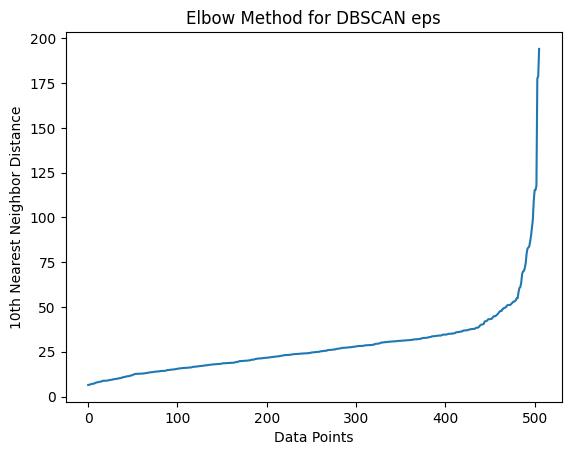

In [58]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(x)
distances, indices = neigh.kneighbors(x)

distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('10th Nearest Neighbor Distance')
plt.title('Elbow Method for DBSCAN eps')
plt.show()

In [27]:
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[kneedle.knee]

print("Optimal epsilon (eps) untuk DBSCAN:", optimal_eps)

Optimal epsilon (eps) untuk DBSCAN: 40.56220641681121


In [28]:
eps_values = np.linspace(optimal_eps * 0.8, optimal_eps * 1.2, 5) 
best_eps = optimal_eps
best_score = -1

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(x)

    if len(set(labels)) > 1:
        score = silhouette_score(x, labels)
        print(f"Eps: {eps:.3f}, Silhouette Score: {score:.3f}")

        if score > best_score:
            best_score = score
            best_eps = eps

print(f"Best eps berdasarkan Silhouette Score: {best_eps:.3f}")

Eps: 32.450, Silhouette Score: 0.486
Eps: 36.506, Silhouette Score: 0.618
Eps: 40.562, Silhouette Score: 0.636
Eps: 44.618, Silhouette Score: 0.639
Eps: 48.675, Silhouette Score: 0.628
Best eps berdasarkan Silhouette Score: 44.618


In [32]:
model = DBSCAN(eps=best_eps, min_samples=5)
labels = model.fit_predict(x)

In [35]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(n_clusters)
print(n_noise)

3
20


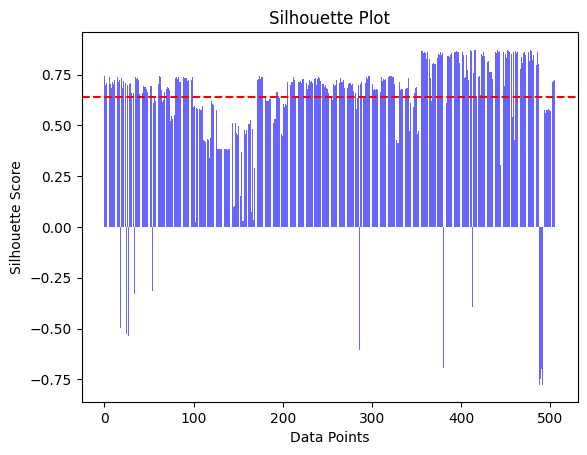

In [38]:
silhouette_vals = silhouette_samples(x, labels)
avg_score = silhouette_score(x, labels)

plt.bar(range(len(silhouette_vals)), silhouette_vals, color='blue', alpha=0.6)
plt.axhline(y=avg_score, color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

In [40]:
silhouette_avg = silhouette_score(x, labels)
print(silhouette_avg)

davies_bouldin_score = davies_bouldin_score(x, labels)
print(davies_bouldin_score)

calinski_harabasz_score = calinski_harabasz_score(x, labels)
print(calinski_harabasz_score)

0.6385652030365639
1.1465167630921513
775.1897131735816


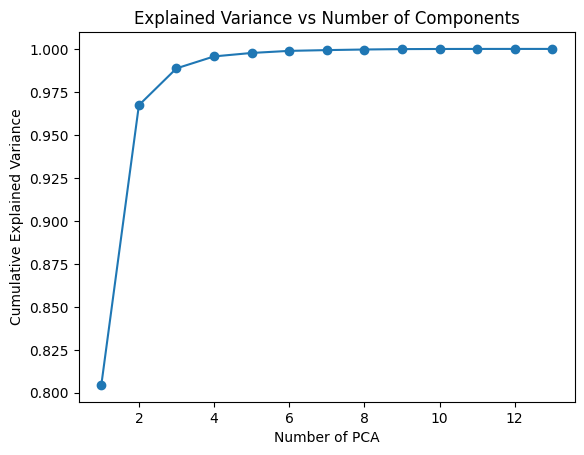

Optimal number of PCA components: 2


In [49]:
pca = PCA().fit(x)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.xlabel('Number of PCA')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Optimal number of PCA components: {optimal_components}")

In [50]:
model_pca = PCA(n_components = 2)
x_PCA = model_pca.fit_transform(x)

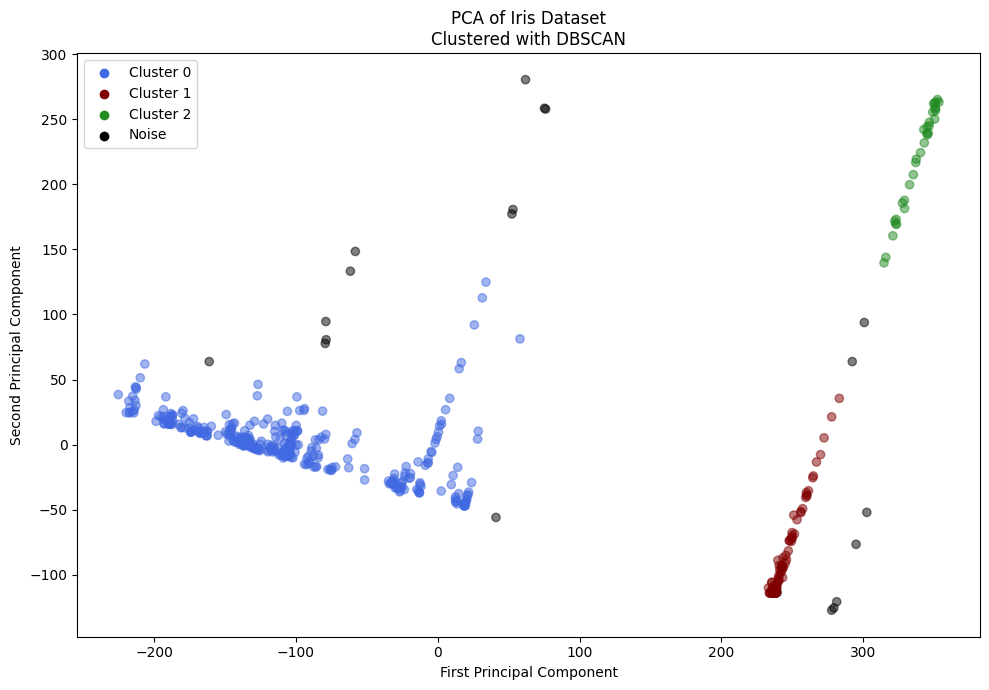

In [52]:
plt.figure(figsize=(10, 7))

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
cluster_colors = vectorizer(labels)
cluster_colors[labels == -1] = 'black'

plt.scatter(x_PCA[:, 0], x_PCA[:, 1], c=cluster_colors, alpha=0.5)
plt.title("PCA of Iris Dataset\nClustered with DBSCAN")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

for i in range(n_clusters):
    plt.scatter([], [], c=colors[i], label=f'Cluster {i}')
plt.scatter([], [], c='black', label='Noise')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
perplexities = [20, 30, 40, 50, 60]
silhouette_scores = []

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    x_tsne = tsne.fit_transform(x_PCA) 
    
    dbscan = DBSCAN(eps=44.618, min_samples=5)
    labels = dbscan.fit_predict(x_tsne)

    if len(set(labels)) > 1:
        score = silhouette_score(x_tsne, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

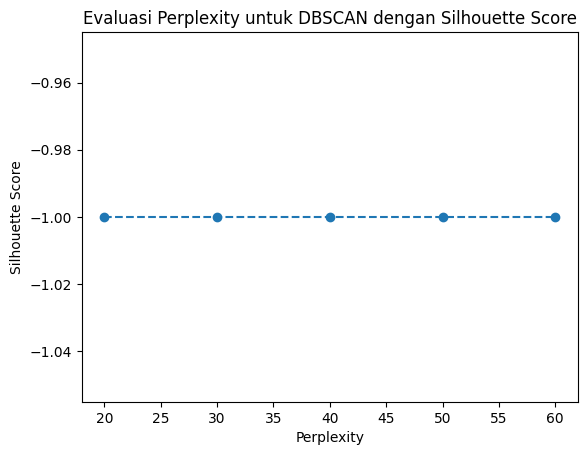

In [61]:
plt.plot(perplexities, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Perplexity')
plt.ylabel('Silhouette Score')
plt.title('Evaluasi Perplexity untuk DBSCAN dengan Silhouette Score')
plt.show()

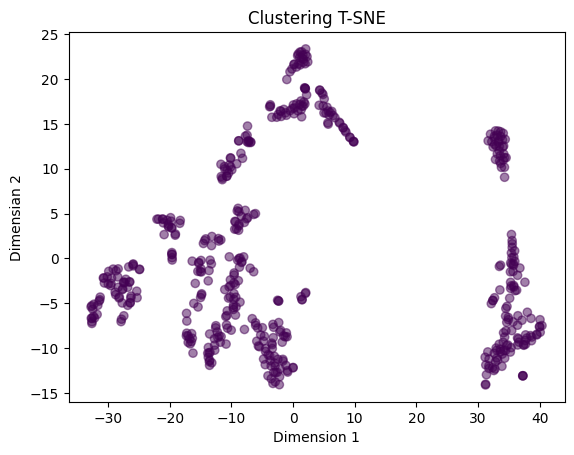

In [67]:
x_tsne = TSNE(n_components=2, perplexity=30).fit_transform(x)
plt.scatter(x_tsne[:,0], x_tsne[:,1], c = labels, cmap = 'viridis', alpha=0.5)
plt.title('Clustering T-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimensian 2')
plt.show()